In [33]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature # Might not need this.

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import tensorflow.keras as keras
import tensorflow as tf
print(tf.__version__)

2.0.0


In [34]:
# Load in data
trainImages = np.load('trnImage.npy')
trainLabels = np.load('trnLabel.npy')

testImages = np.load('tstImage.npy')
testLabels = np.load('tstLabel.npy')

testLabels = testLabels - 1
trainLabels = trainLabels -1

print(trainLabels.shape)

(10000, 1)


In [35]:
def computeFeatures(image):
    # This function computes the HOG features with the parsed hyperparameters and returns the features as hog_feature. 
    # By setting visualize=True we obtain an image, hog_as_image, which can be plotted for insight into extracted HOG features.
    hog_feature, hog_as_image = skimage.feature.hog(image, visualize=True, block_norm='L2-Hys')
    return hog_feature, hog_as_image

In [36]:
my_array = np.zeros((324, 10000))
my_test_array = np.zeros((324, 1000))
#labels_array = np.zeros(10000,)

for i in range(10000):
    features, hog_image = computeFeatures(trainImages[:,:,:,i])
    my_array[:, i] = features

for x in range(1000):
    features, hog_image = computeFeatures(testImages[:,:,:,x])
    my_test_array[:, x] = features
    
#for i in range(10000):
#    labels_array = trainLabels[i]

print(my_array.shape)
print(my_array)
#print(labels_array.shape)
#print(labels_array)

(324, 10000)
[[0.00635811 0.01920765 0.01217736 ... 0.04490437 0.21252506 0.02293872]
 [0.00839428 0.00473263 0.0054246  ... 0.00851013 0.00502404 0.02055349]
 [0.04832912 0.01761932 0.00613002 ... 0.00601955 0.0028512  0.00089031]
 ...
 [0.01382991 0.25589432 0.05638422 ... 0.03078654 0.05064608 0.02484317]
 [0.09835105 0.08250159 0.00461683 ... 0.01877822 0.04379965 0.00299953]
 [0.16365765 0.03275345 0.21952726 ... 0.07656842 0.1453032  0.00714693]]


In [37]:
# Change the shape of the matrix

new_my_array = my_array.T
new_test_array = my_test_array.T

In [46]:
new_my_array.shape

(10000, 324)

(324, 10000)
(324,)


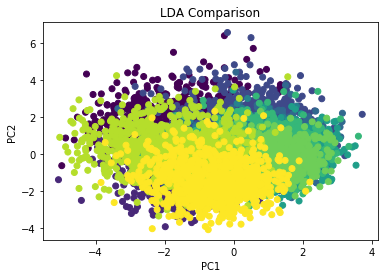

In [38]:
LDA = LinearDiscriminantAnalysis() #n_components=40

print(my_array.shape)
print(features.shape)
#print(labels_array)

LDA.fit(new_my_array, trainLabels.ravel())

lda_new_train_data = LDA.transform(new_my_array)

plt.scatter(lda_new_train_data[:, 0], lda_new_train_data[:, 1], c=trainLabels.ravel())
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('LDA Comparison')
plt.show()

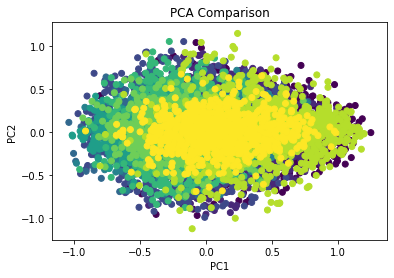

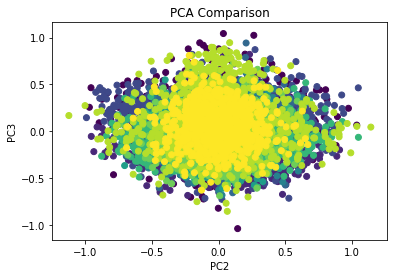

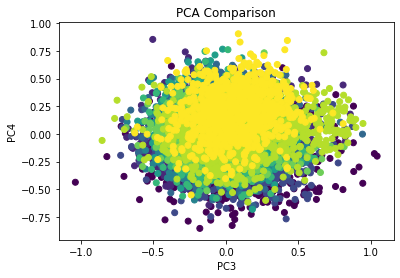

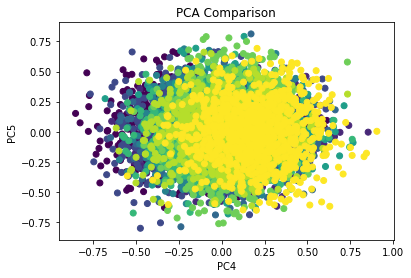

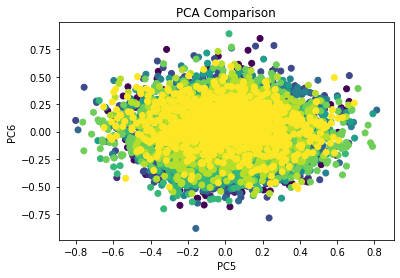

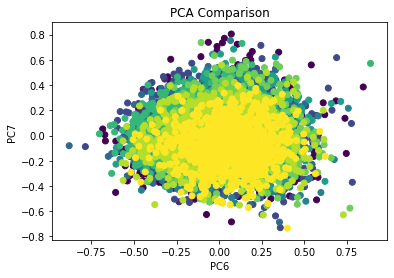

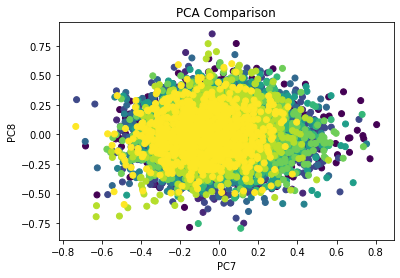

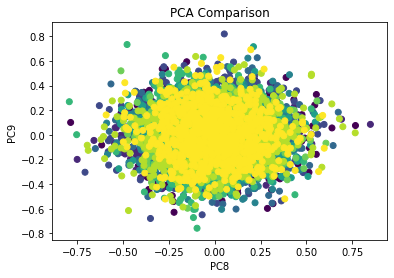

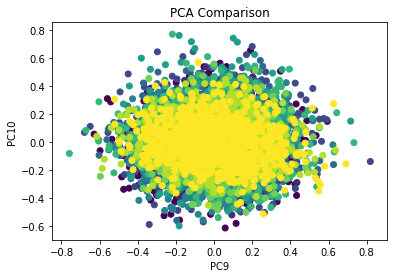

In [39]:
pca = PCA() #n_components = 40

pca.fit(new_my_array)

pca_train_data = pca.transform(new_my_array)


for i in range(9):
    plt.scatter(pca_train_data[:, i], pca_train_data[:, i+1], c=trainLabels.ravel())
    plt.xlabel('PC'+ str(i+1))
    plt.ylabel('PC'+ str(i+2))
    plt.title('PCA Comparison')
    plt.show()

pca.fit(new_test_array)

pca_test_data = pca.transform(new_test_array)

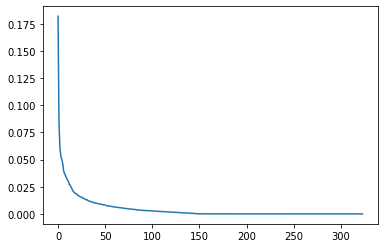

In [40]:
plt.plot(pca.explained_variance_)

In [59]:
# Training the Neural Net with PCA
number_of_classes = 10

# Build our network architecture by stacking layers in a Keras Sequential object.
model = keras.Sequential()

# Create the input layer, this takes an argument of the input data shape (i.e. number of features)
model.add(keras.layers.InputLayer(input_shape=(pca_train_data.shape[1])))

# Create hidden layers
model.add(keras.layers.Dense(45, activation='poly')) # first layer
model.add(keras.layers.Dense(45, activation='sigmoid')) # second layer
model.add(keras.layers.Dense(10, activation='sigmoid')) # third layer

# Create output layer to get predicted class labels.
model.add(keras.layers.Dense(number_of_classes, activation='softmax'))

# Generate a callable keras Model object which contains our architecture.
# This allows us to train and predict our neural network on the datasets.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']) #play around with differnt optimizer

# Fit our model to the data
history = model.fit(pca_train_data, trainLabels, validation_data=(pca_test_data, testLabels), epochs=400, verbose=0)

# Predict probabilities of classes for the testing set.
predicted_probabilities = model.predict(pca_test_data)

# Use argmax to get the predicted class label
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Calculate the percentage accuracy rate on test set
accuracy = np.sum(np.equal(testLabels, predicted_labels.reshape(-1,1)))/ 1000 * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Percentage accuracy on testing set is: 19.50%


In [53]:
accuracy = np.sum(np.equal(testLabels, predicted_labels.reshape(-1,1)))/ 1000 * 100
print(' accuracy = ',accuracy,' %')

 accuracy =  17.2  %


In [55]:
predicted_labels.reshape(-1,1)

array([[8],
       [0],
       [1],
       [1],
       [8],
       [9],
       [8],
       [8],
       [8],
       [1],
       [9],
       [7],
       [1],
       [8],
       [8],
       [1],
       [9],
       [8],
       [9],
       [8],
       [8],
       [5],
       [8],
       [9],
       [2],
       [8],
       [0],
       [8],
       [5],
       [8],
       [9],
       [8],
       [7],
       [0],
       [9],
       [0],
       [1],
       [9],
       [0],
       [3],
       [8],
       [0],
       [2],
       [8],
       [6],
       [0],
       [9],
       [0],
       [8],
       [9],
       [1],
       [5],
       [5],
       [0],
       [9],
       [8],
       [8],
       [0],
       [8],
       [0],
       [8],
       [6],
       [8],
       [9],
       [9],
       [9],
       [8],
       [9],
       [9],
       [8],
       [6],
       [7],
       [4],
       [9],
       [2],
       [9],
       [6],
       [8],
       [7],
       [8],
       [8],
       [8],
       [9],
    

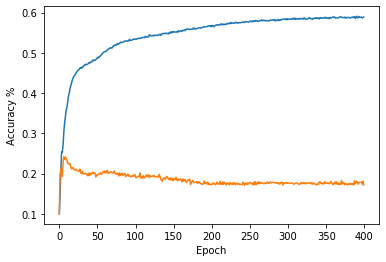

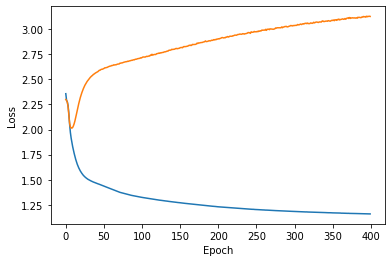

In [56]:
# Plot the training curves for model accuracy
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy %')
plt.xlabel('Epoch')

# Plot the training curves for the model's loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()